# Optional Lab: Feature Engineering and Polynomial Regression



# Goal
- play with polyno.. regression and feature engineering


In [154]:
import copy, math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lab_utils_multi import  load_house_data, run_gradient_descent 
from lab_utils_multi import  norm_plot, plt_equal_scale, plot_cost_i_w
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

In [155]:
#compute derivatve
def derivatve(w,b,y,x):
    m = x.shape[0]
    n = x.shape[1]
    dj_w = np.zeros(n)
    dj_b = 0
    for i in range(m):
        err=(np.dot(w,x[i])+b)-y[i]
        for j in range(n):
            dj_w[j]+=err*x[i][j]
        dj_b+=err
    return dj_w/m,dj_b/m


In [162]:
#gradient
def gradient(w,b,x,y,l_r,times,mod):
    cost = []
    ite = []
    for i in range(times):
        ans = derivatve(w,b,y,x)
        w=w-l_r*ans[0]
        b=b-l_r*ans[1]
        if i % mod ==0:
            cost.append(cost_f(predict(w,b,x),x,y))
            ite.append(i)
    return w,b,cost,ite

In [163]:
# compute predict output
def predict(w,b,x):
    m = x.shape[0]
    y_hat = np.zeros(m)
    for i in range(m):
        y_hat[i]=np.dot(w,x[i])+b
    return y_hat


In [164]:
#compute cost f (square avreage error)
def cost_f(y_hat,x,y):
    m = x.shape[0]
    out = 0
    for i in range(m):
        out+=(y_hat[i]-y[i])**2
    return out/(2*m)


# Feature Scaling
- Z-score normalization

After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$

In [159]:
def z_score(x):
    m = x.shape[0]
    n = x.shape[1]
    mu =np.mean(X_train,axis=0)
    sigma = np.std(X_train,axis=0)
    X_norm = (x-mu)/sigma
    return X_norm,mu,sigma
            
    

# try polynomial

ite: 0, cost = 1657.5632937500002
ite: 1000, cost = 440.9539439220239
ite: 2000, cost = 438.9096549253044
ite: 3000, cost = 438.90004538467747
ite: 4000, cost = 438.9000002133387
w= [19.]
b = -55.999913457635934


[Text(0.5, 1.0, 'cost vs iterations')]

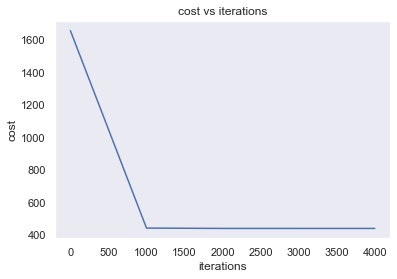

In [179]:
#get result
x = np.arange(0, 20, 1)
y_train = 1 + x**2
X_train = x.reshape(-1, 1)
#to rescale feature
#X_train,mu,sigma = z_score(X_train)
b_i = 0
w_i = np.zeros(X_train.shape[1] )
w,b,cost,ite=gradient(w_i,b_i,X_train,y_train,0.01,5000,1000)

for i in range(len(cost)):
    print(f"ite: {ite[i]}, cost = {cost[i]}")
print(f"w= {w}")
print(f"b = {b}")

#print cost vs ite
sns.set(style="dark")
dd = {
  "iterations":ite,
  "cost": cost
}
df = pd.DataFrame(dd)
sns.lineplot(x="iterations",
             y="cost",data=df).set(title='cost vs iterations')

- looks like curve fit better than straight line wright?
its need function like this $y= w_0x_0^2 + b$ to fit will

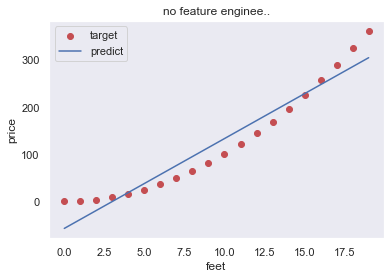

In [180]:
#print y_hat vs y same input
plt.scatter(X_train,y_train,c='r',label='target')
plt.plot(X_train,predict(w,b,X_train),label='predict')
plt.xlabel('feet')
plt.ylabel('price')
plt.title ("no feature enginee..")  
plt.legend()
plt.show()

# try this $y= w_0x_0^2 + b$
- looks good

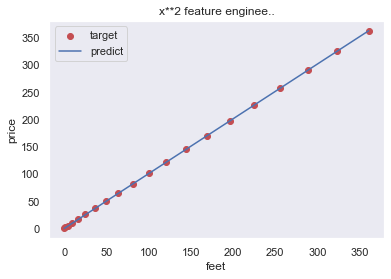

In [192]:
x = np.arange(0, 20, 1)
y_train = 1 + x**2
x = x**2
X_train = x.reshape(-1, 1)

#to rescale feature
#X_train,mu,sigma = z_score(X_train)
b_i = 0
w_i = np.zeros(X_train.shape[1] )
w,b,cost,ite=gradient(w_i,b_i,X_train,y_train,0.000001,5000,1000)
#print y_hat vs y same input
plt.scatter(x,y_train,c='r',label='target')
plt.plot(x,predict(w,b,X_train),label='predict')
plt.xlabel('feet')
plt.ylabel('price')
plt.title ("x**2 feature enginee..")  
plt.legend()
plt.show()

  # 𝑦=𝑤0𝑥0+𝑤1𝑥21+𝑤2𝑥32+𝑏  ?

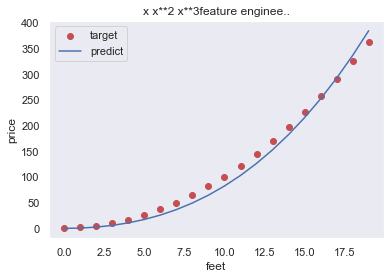

In [193]:
x = np.arange(0, 20, 1)
y_train = 1 + x**2
X_train=np.c_[x,x**2,x**3]
#to rescale feature
#X_train,mu,sigma = z_score(X_train)
b_i = 0
w_i = np.zeros(X_train.shape[1] )
w,b,cost,ite=gradient(w_i,b_i,X_train,y_train,1e-7,10000,1000)
#print y_hat vs y same input
plt.scatter(x,y_train,c='r',label='target')
plt.plot(x,predict(w,b,X_train),label='predict')
plt.xlabel('feet')
plt.ylabel('price')
plt.title ("x x**2 x**3feature enginee..")  
plt.legend()
plt.show()

# rescale above model

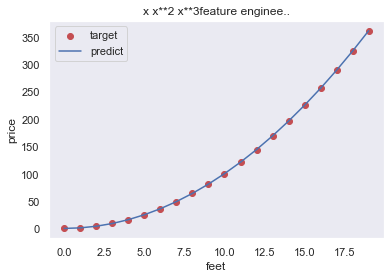

In [198]:
x = np.arange(0, 20, 1)
y_train = 1 + x**2
X_train=np.c_[x,x**2,x**3]
#to rescale feature
X_train,mu,sigma = z_score(X_train)
b_i = 0
w_i = np.zeros(X_train.shape[1] )
w,b,cost,ite=gradient(w_i,b_i,X_train,y_train,1e-1,100000,10000)
#print y_hat vs y same input
plt.scatter(x,y_train,c='r',label='target')
plt.plot(x,predict(w,b,X_train),label='predict')
plt.xlabel('feet')
plt.ylabel('price')
plt.title ("x x**2 x**3feature enginee..")  
plt.legend()
plt.show()